<a href="https://colab.research.google.com/github/Uysim/logistic-regression/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
breast_cancer = load_breast_cancer()
data = breast_cancer["data"]
target = breast_cancer["target"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True)

Since the output can be rounded by sigmoid function to 0 or 1 because some input values are too small or too large, we later get the logarithm of zero which equals to the negative infinitely large number and cannot be used for further computations. That’s why we manually bound our sigmoid function:

In [0]:
def sigmoid(x):
  return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.0001)

![alt text](https://i.imgur.com/Ke0U8oG.png)

In [0]:
def lost_function(x, y, theta):
  t = x.dot(theta)
  return -np.sum(y * np.log(sigmoid(t)) + (1 - y) * np.log(1 - sigmoid(t)))


we need to define the cost function for the logistic regression. The most common approach is to iterate over training examples to apply sigmoid to them, then iterate one more time to count the sum of losses. 

The idea of cost function is that we count the sum of the metric distances between our hypothesis and real labels on the training data. The more optimized our parameters are, the less is the distance between the true value and hypothesis. But how can we minimize this distance?

However, we use numpy to apply sigmoid to the whole array and count losses of all the array with just a few lines of code:

In [0]:
def cost_function(x, y, theta):
  return lost_function(x, y, theta) / x.shape[0]


In [0]:
def gradient_cost_function(x, y, theta):
  t = x.dot(theta)
  return x.T.dot(y - sigmoid(t)) / x.shape[0]

In [0]:
def update_theta(x, y, theta, learning_rate):
  return theta + learning_rate * gradient_cost_function(x, y, theta)

In [9]:
def train(x, y, learning_rate, iterations=500, threshold=0.0005):
  theta = np.zeros(x.shape[1])
  costs = []
  print("Start training")
  
  for i in range(iterations):
    theta = update_theta(x, y, theta, learning_rate)
    cost = cost_function(x, y, theta)
    print(f"[Training step #{i}] — Cost function: {cost:.4f}")
    costs.append({"cost": cost, "weights": theta})
             
    if i > 15 and abs(costs[-2]["cost"] - costs[-1]["cost"]) < threshold:
      break
  return theta, costs

theta, costs = train(X_train, y_train, learning_rate=0.0001)

Start training
[Training step #0] — Cost function: 4.6335
[Training step #1] — Cost function: 3.5830
[Training step #2] — Cost function: 5.6246
[Training step #3] — Cost function: 3.5703
[Training step #4] — Cost function: 5.6275
[Training step #5] — Cost function: 4.3036
[Training step #6] — Cost function: 3.5830
[Training step #7] — Cost function: 5.6236
[Training step #8] — Cost function: 3.5651
[Training step #9] — Cost function: 5.6275
[Training step #10] — Cost function: 3.9641
[Training step #11] — Cost function: 3.5830
[Training step #12] — Cost function: 5.6220
[Training step #13] — Cost function: 3.5043
[Training step #14] — Cost function: 5.6275
[Training step #15] — Cost function: 3.6064
[Training step #16] — Cost function: 3.5830
[Training step #17] — Cost function: 5.6202
[Training step #18] — Cost function: 3.3448
[Training step #19] — Cost function: 5.6275
[Training step #20] — Cost function: 2.5116
[Training step #21] — Cost function: 3.5830
[Training step #22] — Cost 

In [0]:
def predict(x, theta):
  return (sigmoid(x.dot(theta)) >= 0.5).astype(int)

Let’s compare, how predicted data are different than real:

In [0]:
def get_accuracy(x, y, theta):
  y_pred = predict(x, theta)
  return (y_pred == y).sum() / y.shape[0]

In [12]:
print(f"Accuracy on the training set: {get_accuracy(X_train, y_train, theta)}")
print(f"Accuracy on the test set: {get_accuracy(X_test, y_test, theta)}")

Accuracy on the training set: 0.9054945054945055
Accuracy on the test set: 0.9122807017543859


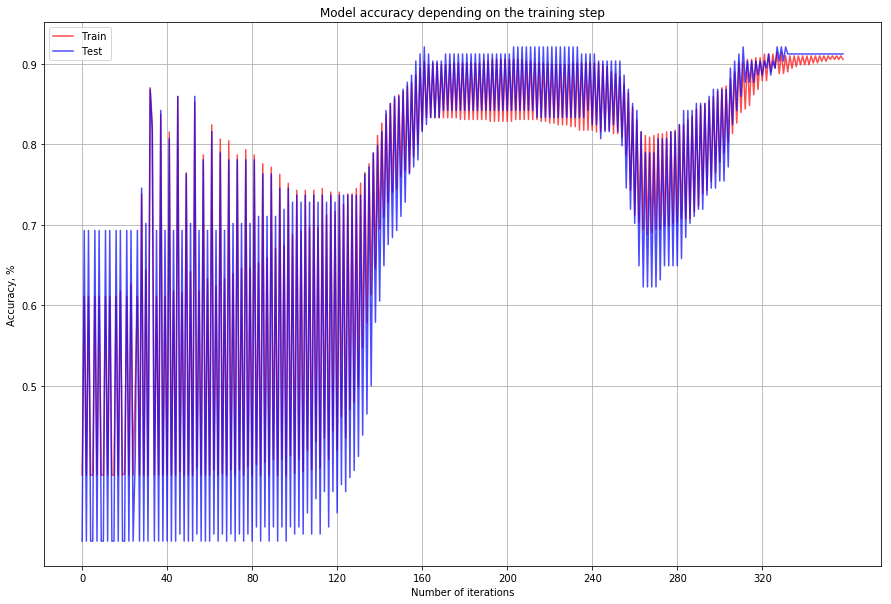

In [13]:
plt.figure(figsize=(15,10))
plt.title("Model accuracy depending on the training step")
plt.plot(np.arange(0, len(costs)), [get_accuracy(X_train, y_train, c["weights"]) for c in costs], alpha=0.7, label="Train", color="r")
plt.plot(np.arange(0, len(costs)), [get_accuracy(X_test, y_test, c["weights"]) for c in costs], alpha=0.7, label="Test", color="b")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy, %")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(np.arange(0, len(costs)+1, 40))
plt.yticks(np.arange(0.5, 1, 0.1))
plt.show()